In [1]:
from IO.stero import *

In [2]:
# Load the data
gem_df = read_gem_file('F:\Adult.gem')
df = enhance_df_info(gem_df)
adata = get_annadata(df)

In [4]:
df

,x,y,UMICount,geneID,bin_x,bin_y,x_center,y_center,cell_id
0,10646,5434,1,AMEX60DD000045,129,1,10640,5430,129_1
1,10767,5423,3,AMEX60DD000048,135,1,10760,5430,135_1
2,10796,5407,1,AMEX60DD000048,137,0,10800,5410,137_0
3,11046,5447,1,AMEX60DD000050,149,2,11040,5450,149_2
4,10972,5423,1,AMEX60DD000054,146,1,10980,5430,146_1
...,...,...,...,...,...,...,...,...,...
42390760,10638,11485,1,AMEX60DDU001039069,129,304,10640,11490,129_304
42390761,9661,11466,1,AMEX60DDU001039741,80,303,9660,11470,80_303
42390762,9663,11453,1,AMEX60DDU001039741,80,302,9660,11450,80_302
42390763,10054,11472,3,AMEX60DDU001039793,100,303,10060,11470,100_303


In [11]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

F:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_genes_by_counts'>

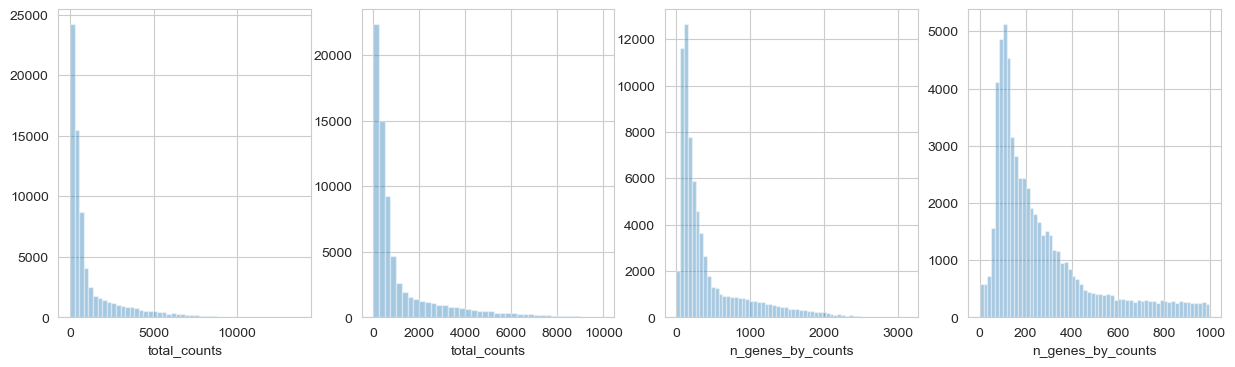

In [4]:
# Clean up data
sc.pp.calculate_qc_metrics(adata, inplace=True)
# Plot the raw data
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 1000], kde=False, bins=60, ax=axs[3])

In [5]:
# Normalize genes count and log1p
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
# Select top 2000 variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [8]:
# cluster
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)
sc.pp.neighbors(adata, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

In [9]:
sc.pl.spatial(adata, spot_size=1)

KeyError: "Could not find 'spatial' or 'X_spatial' in .obsm"

In [13]:
sc.pp.filter_genes(adata, min_cells=50)
adata

AnnData object with n_obs × n_vars = 71998 × 16261
    obs: 'cell_id', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [17]:
adata.obs

,cell_id,x,y,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters
0,129_1,129,1,87,4.477337,124.0,4.828314,70.161290,100.000000,100.0,100.0,21
1,135_1,135,1,25,3.258097,34.0,3.555348,100.000000,100.000000,100.0,100.0,16
2,137_0,137,0,109,4.700480,137.0,4.927254,56.934307,93.430657,100.0,100.0,3
3,149_2,149,2,110,4.709530,174.0,5.164786,65.517241,94.252874,100.0,100.0,14
4,146_1,146,1,118,4.779123,159.0,5.075174,57.232704,88.679245,100.0,100.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
71993,113_303,113,303,77,4.356709,108.0,4.691348,75.000000,100.000000,100.0,100.0,8
71994,133_304,133,304,80,4.394449,148.0,5.003946,79.729730,100.000000,100.0,100.0,19
71995,111_303,111,303,64,4.174387,106.0,4.672829,86.792453,100.000000,100.0,100.0,9
71996,134_304,134,304,68,4.234107,132.0,4.890349,86.363636,100.000000,100.0,100.0,7


In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [8]:
H = get_coor_matrix(df)